In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\chira\Downloads\nifty50_june2025_rebalance.csv")

df.head()

,Stock,Market_Cap,Weight_Before,Weight_After,Avg_Daily_Volume
0,BSE,714673,0.000,0.012,105
1,INDIGO,577875,0.000,0.010,499
2,INDUSINDBK,207337,0.015,0.000,226
3,HEROMOTOCO,721368,0.012,0.000,1295
4,RELIANCE,269305,0.100,0.098,109


In [3]:
df.isnull().sum()

Stock               0
Market_Cap          0
Weight_Before       0
Weight_After        0
Avg_Daily_Volume    0
dtype: int64

In [4]:
df["Weight_Before"].sum()

0.41000000000000003

In [5]:
df["Weight_After"].sum()

0.4089999999999999

# Simulate a ₹1000 crore ETF that must rebalance according to the Weight_Before → Weight_After changes.



Calculating Flow per stock

In [6]:
total_fund = 1000   #Crores

# Calculating Weight change
df["Weight_Change"] = df["Weight_After"] - df["Weight_Before"]

# Flow amount = how much ETF will buy/sell per stock
df["Flow_Amount"] = df["Weight_Change"] * total_fund

df.head(3)

,Stock,Market_Cap,Weight_Before,Weight_After,Avg_Daily_Volume,Weight_Change,Flow_Amount
0,BSE,714673,0.000,0.012,105,0.012,12.0
1,INDIGO,577875,0.000,0.010,499,0.010,10.0
2,INDUSINDBK,207337,0.015,0.000,226,-0.015,-15.0


Estimating Flow Pressure

In [7]:
# Flow %
df["Flow_to_Volume_%"] = (df["Flow_Amount"] /df["Avg_Daily_Volume"]) * 100

# Absolute pressure (For sorting)

df["Abs_Flow_to_Volume_%"] = df["Flow_to_Volume_%"].abs()

In [8]:
df.head(3)

,Stock,Market_Cap,Weight_Before,Weight_After,Avg_Daily_Volume,Weight_Change,Flow_Amount,Flow_to_Volume_%,Abs_Flow_to_Volume_%
0,BSE,714673,0.000,0.012,105,0.012,12.0,11.428571,11.428571
1,INDIGO,577875,0.000,0.010,499,0.010,10.0,2.004008,2.004008
2,INDUSINDBK,207337,0.015,0.000,226,-0.015,-15.0,-6.637168,6.637168


Visualizing Top Pressure Stocks

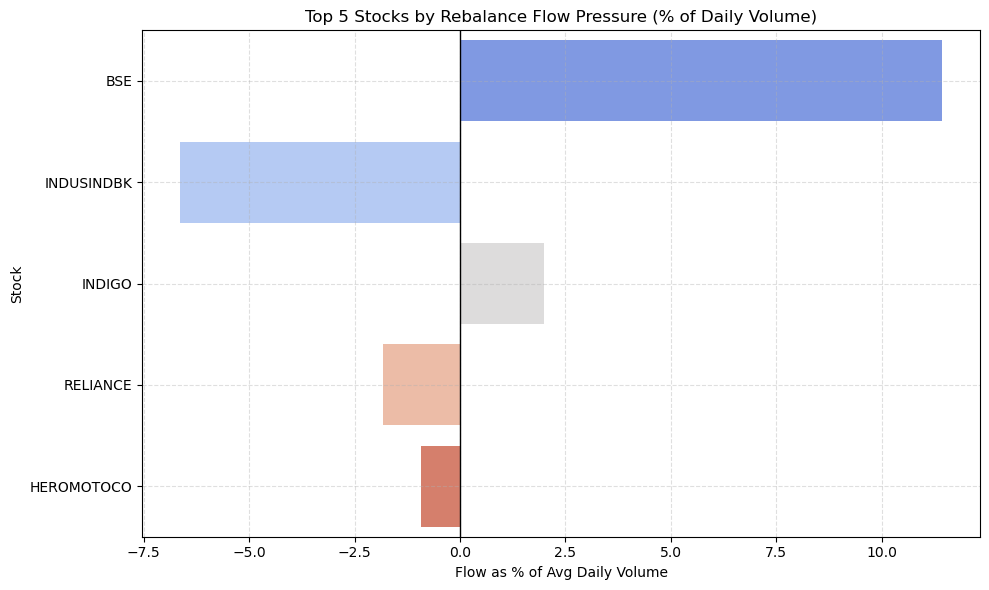

In [9]:
# Sort and pick top 5 pressure stocks
top_pressure = df.sort_values("Abs_Flow_to_Volume_%", ascending = False).head(5)

#Plot pressure

plt.figure(figsize = (10,6))
sns.barplot(data = top_pressure,
            x = "Flow_to_Volume_%",
            y = "Stock",
            hue = "Stock",
            legend = False,
            palette = "coolwarm",
            orient = "h",
           )
plt.axvline(0, color = "black", linewidth = 1)
plt.title("Top 5 Stocks by Rebalance Flow Pressure (% of Daily Volume)")
plt.xlabel("Flow as % of Avg Daily Volume")
plt.ylabel("Stock")
plt.grid(True, linestyle = "--", alpha = 0.4)
plt.tight_layout()

plt.show()
            

In [10]:
df.to_csv("7.NIFTY50_June2025_Rebalance_Output.csv", index = False)